In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [3]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [4]:

print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [19]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_sca=scaler.fit_transform(X_train)
X_test_sca=scaler.fit_transform(X_test)


In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [35]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile( loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [43]:
history=model.fit(X_train_sca,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8681 - val_loss: 0.3298 - val_accuracy: 0.8644
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.8680 - val_loss: 0.3305 - val_accuracy: 0.8631
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8669 - val_loss: 0.3297 - val_accuracy: 0.8619
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8666 - val_loss: 0.3301 - val_accuracy: 0.8612
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.8677 - val_loss: 0.3297 - val_accuracy: 0.8619
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3245 - accuracy: 0.8695 - val_loss: 0.3313 - val_accuracy: 0.8594
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.8687 - val_loss: 0.3303 - val_accuracy: 0.8625

In [38]:
model.layers[0].get_weights()

[array([[-0.04527539,  0.10943793, -0.28624818, -0.02229764,  0.07354167,
         -0.0320585 ,  0.1008295 , -0.09618469,  0.24166004,  0.07489275,
         -0.04912818],
        [ 0.30802777,  0.7748567 ,  0.08580815,  0.43184844,  0.43519774,
          0.8508498 , -0.61866933, -0.03267028, -0.06101071, -0.38906386,
         -0.15108767],
        [-0.04643377,  0.19714697,  0.22030595,  0.0450683 ,  0.3949905 ,
          0.23004787, -0.07851523,  0.16208917,  0.06213981,  0.06403393,
         -0.43216336],
        [ 0.19823077,  0.28532457,  0.15483485, -0.241525  , -0.6228861 ,
         -0.7791298 , -0.24289829,  1.0431322 , -0.6466765 , -0.928535  ,
          0.14205326],
        [-1.1295063 , -0.15871578,  0.23756206,  1.2922543 , -0.23651695,
         -1.2246025 , -0.07861388, -0.60781544, -0.2742256 , -0.4160233 ,
          0.03946957],
        [-0.2826085 , -0.22797404, -0.1461131 , -0.05938236,  0.2785325 ,
          0.1767041 , -0.3007419 ,  0.19964801,  0.40532178, -0.2508090

In [39]:
y_log=model.predict(X_test_sca)

In [40]:
y_pred=np.where(y_log>0.5,0,1)

In [41]:
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.14

In [44]:
import matplotlib.pyplot as plt

In [46]:
history.history

{'loss': [0.3258763551712036,
  0.3251888155937195,
  0.32540684938430786,
  0.3253634572029114,
  0.3252616822719574,
  0.3244855999946594,
  0.32526397705078125,
  0.32540363073349,
  0.3246503174304962,
  0.32464709877967834,
  0.32461318373680115,
  0.32492485642433167,
  0.32448050379753113,
  0.3243751525878906,
  0.32397329807281494,
  0.3242153227329254,
  0.3243233859539032,
  0.3239637017250061,
  0.32386061549186707,
  0.32345858216285706,
  0.3232567608356476,
  0.32320377230644226,
  0.323909193277359,
  0.32371294498443604,
  0.3235873878002167,
  0.3234085142612457,
  0.3237358331680298,
  0.3227318823337555,
  0.323286235332489,
  0.3228752017021179,
  0.3233114182949066,
  0.3232213854789734,
  0.32244327664375305,
  0.3224891722202301,
  0.3226291537284851,
  0.32270827889442444,
  0.32214850187301636,
  0.32267409563064575,
  0.3219987154006958,
  0.3222212493419647,
  0.3216518461704254,
  0.3222217559814453,
  0.32228267192840576,
  0.3218240737915039,
  0.32222914

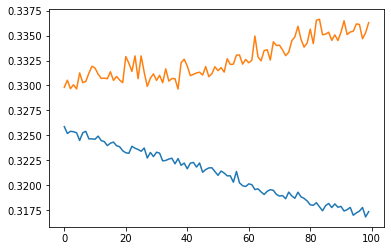

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

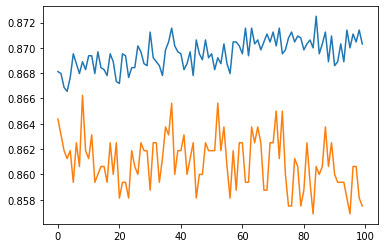

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])